# The Representative Consumer: Scenarios & The Labour Supply Curve

This notebook illustrates how to code a portion of the One-Period Macroeconomic Model in Python. In this notebook, I specifically demonstrate how to model scenarios for the representative consumer's optimization problem, the income and substitution effects. Lastly, I will also show how to plot the labour supply curve under the One-Period Macroeconomic Model. The model is based from *Macroeconomics, Fifth Edition* by Williamson (2014). 

[Quant Econ](https://quantecon.org/) and [NumEconCopenhagen](https://numeconcopenhagen.netlify.app/lectures/Optimize_print_and_plot) are useful resources that informed me in writing this notebook. 

## Table of Contents
- [The Model](#TheModel)
- [Scenario I: The Pure Income Effect](#scenarioI)
- [Scenario II: The Substitution Effect](#scenarioII)
- [The Labour Supply Curve](#labsupply)
- [A Shift In The Labour Supply Curve](#labsupplyshift)

## The Model <a name="TheModel"></a>

To revisit, the representative consumer's optimization problem is defined as: 

$$U(C, l) = l^{\alpha}C^{1-\alpha}$$

Subject to: 

$$C = w(h-l) + \pi - T$$

Where real total consumption equals real disposable income, $C\geq0$, $w>0$, $\pi>0$, $T>0$, and $0\leq l\leq h$. The consumer receives his income from various sources. $N^{s}$ is time spent working and is defined as the difference between leisure, $l$ and the assumed amount of hours available, $h$. As in the prior notebook, I first imported the relevant libraries: `numpy`, `matplotlib`, `pandas`, and `scipy`. Next, I created Python functions for the utility function, the indifference curve (IC), and the budget constraint. These functions were used in the previous note for the representative consumer.

In [1]:
"""
Import relevant libraries
"""
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.optimize import minimize_scalar 
import pandas as pd

# Python function for Cobb-Douglas utility function
def U(L, C, alpha=0.3): 
    return L**alpha * C**(1-alpha) # return Utility

# Python function for indifference curve
def C_indifference(L, ubar, alpha): # Python function for the IC, I define leisure as the x-axis
    return ubar**(1/(1-alpha)) * L**(-alpha/(1-alpha)) # return values of the indifference curve

# Python function for the budget constraint
def C_bc(H, l, w, pi, T): 
    return  (-w*l) + (w*H) + (pi - T) # return values of the budget constraint

## Scenario I: The Pure Income Effect <a name="scenarioI"></a>

In this section, I assessed a scenario where the dividend income, $\pi$ increased, and how the representative consumer responded to this change. I first established parameters for this scenario and a Python function for plotting the budget constraint. In this scenario, $\pi$ increased from $\pi_{1} = 200$ to $\pi_{2} = 300$.

In [2]:
"""
Scenario I: The Pure Income Effect
"""
# Establish parameters for plotting pure income effect
H = 24 # A fixed value; let's assume 24 hours in a period.
w = 15 # wage rate
pi = 200 # dividend income
pi_= 300 # new dividend income
T = 50 # lump-sum tax
l =  np.linspace(1, H, 100).reshape((100, 1)) # set NumPy array for leisure;

def plot_budget_constraint_(ax, l, H, w, pi, T): # function for plotting budget constraint when Pi > T
    C_ = C_bc(H, l, w, pi, T)
    c_max = np.max(C_) # find max value of the consumption budget constraint
    v = [1, 30, 1, c_max+100] # Set the axes range;
    ax.set(title="Scenario I: An increase in Dividend Income, $\pi$ (Pure Income Effect)", xlabel=r'leisure, l', ylabel=r'Consumption, C')
    # ax.plot(l, C_)
    l = np.array(l.flatten(), dtype=float)
    C_ = np.array(C_.flatten(), dtype=float)
    ax.plot(l, C_, color='tab:blue')
    ax.fill_between(l, 1, C_, alpha=0.2, color='tab:blue')
    # horizontal line indicating Pi-T
    plt.hlines(y=min(C_), xmin=0, xmax=H, color='tab:blue', linestyles='dotted')
    # vertical line in the budget constraint
    plt.vlines(x=H,ymin=0,ymax=min(C_), color='tab:blue')
    plt.axis(v)

Next, I used `minimize_scalar()` function from `scipy.optimize` to solve the optimal solutions under $\pi_{1}$ and $\pi_{2}$, denoted as `objective_new()`. All variables in this note that relate to the $\pi_{2}$ are denoted with `_new`. 

In [3]:
"""
Find the optimal solutions at original dividend income, and the new dividend income
"""
# objective function for the old optimal solution
def objective_(l, H = 24, w = 15, pi = 200, T = 50):
    """
    Return value of -U for a given leisure, at a possible level of consumption.
    """
    C = C_bc(H, l, w, pi, T)
    return -U(l, C)

result_ = minimize_scalar(objective_)
optimal_l_ = result_.x # get optimal leisure
optimal_C_ = C_bc(H, optimal_l_, w, pi, T) # derive optimal Consumption
optimal_U_ = U(optimal_l_, optimal_C_) # solve for optimal Utility

# objective function for the new optimal solution given increase in real wages
def objective_new(l, H = 24, w = 15, pi = 300, T = 50):
    """
    Return value of -U for a given leisure, at a possible level of consumption.
    """
    C = C_bc(H, l, w, pi, T)
    return -U(l, C)

# solve the new optimal solution under new level of dividend income
result_new = minimize_scalar(objective_new)
optimal_l_new = result_new.x # get optimal leisure
optimal_C_new = C_bc(H, optimal_l_new, w, pi_, T) # derive optimal Consumption
optimal_U_new = U(optimal_l_new, optimal_C_new) # solve for optimal Utility

Lastly, I plotted the change in dividend income and the movement from the original optimal bundle under $\pi_{1}$ to the new optimal bundle under $\pi_{2}$.

Text(24, 330, '$IC_{2}$')

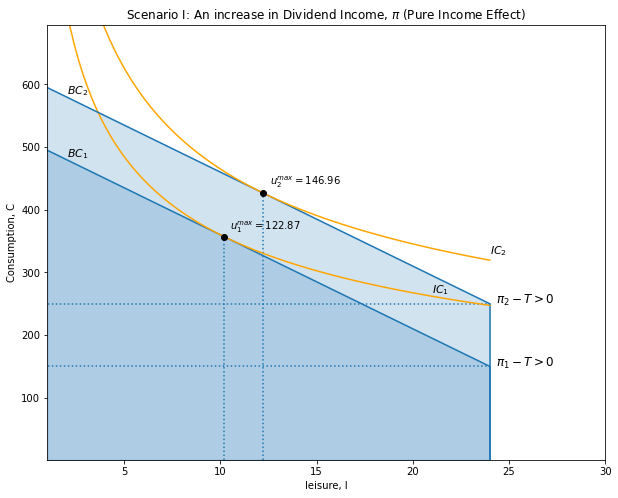

In [4]:
"""
Plot the change in dividend income
"""
fig, ax = plt.subplots(figsize=(10, 8)) # unpack plt.subplots into a tuple for plotting
plot_budget_constraint_(ax, l, H, w, pi, T) # call the plot_budget_constraint_ax() function
ax.plot(l, C_indifference(l, optimal_U_, alpha=0.3), color='orange')
ax.plot(optimal_l_, optimal_C_,'ro',color='black') # a black dot
ax.text(optimal_l_*1.03,optimal_C_*1.03,f'$u^{{max}}_{1} = {np.round(optimal_U_,2)}$') # multiply by 1.03 to give space;
plt.vlines(x=optimal_l_,ymin=0,ymax=optimal_C_, color='tab:blue', linestyles='dotted')
ax.text(24.3, 150.3, "$\pi_{1}-T > 0$", fontsize=12) # add text describing the kink at old pi

plot_budget_constraint_(ax, l, H, w, pi_, T)
ax.plot(l, C_indifference(l, optimal_U_new, alpha=0.3), color='orange')
ax.plot(optimal_l_new, optimal_C_new,'ro',color='black') # a black dot
ax.text(optimal_l_new*1.03,optimal_C_new*1.03,f'$u^{{max}}_{2} = {np.round(optimal_U_new,2)}$') # multiply by 1.03 to give space;
ax.vlines(x=optimal_l_new,ymin=0,ymax=optimal_C_new, color='tab:blue', linestyles='dotted')
ax.text(24.3, 250.3, "$\pi_{2}-T > 0$", fontsize=12) # add text describing the kink at new pi
ax.text(2, 585, "$BC_{2}$", fontsize=11) # add a label indicating new budget constraint (BC)
ax.text(2, 485, "$BC_{1}$", fontsize=11) # add a label indicating original budget constraint (BC)
ax.text(21, 267, "$IC_{1}$", fontsize=11) # add a label indicating original IC
ax.text(24, 330, "$IC_{2}$", fontsize=11) # add a label indicating new IC

As shown in the plot above,  $U^{max}_{1}$ points to the optimal utility and the bundle of $C$ and $l$ that corresponds to $\pi_{1}$. $BC$ denotes the budget constraints while $IC$ denotes the indifference curves. The movement to a new bundle under $\pi_{2}$ is described by the point showing optimal utility, $U^{max}_{2}$. This scenario is called the pure income effect because while there is an increase in $\pi-T$, prices (the real wage, $w$) stayed constant.

## Scenario II: The Substitution Effect <a name="scenarioII"></a>

In the previous section, we explored a change in $\pi - T$, holding $w$ constant. In this section, we assess a scenario where $w$ increased, holding $\pi - T$ constant, and how the representative consumer responds to this change. The substitution effect captures the movement along the original IC in response to a change in $w$. In this scenario, $w$ increased by $30.00. To begin plotting the substitution effect, I first established the necessary parameters and the Python function necessary for plotting this scenario.

In [11]:
"""
Scenario II: The Substitution Effect
"""
# Re-set parameters
H = 24 # A fixed value; let's assume 24 hours in a period.
w = 15 # wage rate
w_ = 30 # new wage rate
pi = 200 # dividend income
T = 50 # lump-sum tax
l =  np.linspace(1, H, 100).reshape((100, 1)) # set NumPy array for leisure;

# function for plotting the budget constraint given change in w
def plot_budget_constraint_(ax, l, H, w, pi, T): # function for plotting budget constraint when Pi > T
    C_ = C_bc(H, l, w, pi, T)
    c_max = np.max(C_) # find max value of the consumption budget constraint
    v = [1, 30, 1, c_max+100] # Set the axes range;
    ax.set(title="Scenario II: An increase in Real Wage, $w$ (Substitution Effect)", xlabel=r'leisure, $l$', ylabel=r'Consumption, $C$')
    # ax.plot(l, C_)
    l = np.array(l.flatten(), dtype=float)
    C_ = np.array(C_.flatten(), dtype=float)
    ax.plot(l, C_, color='tab:blue')
    ax.fill_between(l, 1, C_, alpha=0.2, color='tab:blue')
    # horizontal line indicating Pi-T
    plt.hlines(y=min(C_), xmin=0, xmax=H, color='tab:blue', linestyles='dotted')
    # vertical line in the budget constraint
    plt.vlines(x=H,ymin=0,ymax=min(C_), color='tab:blue')
    plt.axis(v)

In the section of code below, I calculated the optimal solutions under the original $w$, $w_{1}$ and the new $w$, $w_{2}$. Similar to the pure income effect section, I used `minimize_scalar()` function from `scipy.optimize` to solve the optimal solutions.

In [12]:
"""
Find the optimal solutions at original real wage, and the new real wage.
"""
# objective function for the old optimal solution
def objective_(l, H = 24, w = 15, pi = 200, T = 50):
    """
    Return value of -U for a given leisure, at a possible level of consumption.
    """
    C = C_bc(H, l, w, pi, T)
    return -U(l, C)

result_ = minimize_scalar(objective_)
optimal_l_ = result_.x # get optimal leisure
optimal_C_ = C_bc(H, optimal_l_, w, pi, T) # derive optimal Consumption
optimal_U_ = U(optimal_l_, optimal_C_) # solve for optimal Utility

# objective function for the new optimal solution at new real wage
def objective_new(l, H = 24, w = 30, pi = 200, T = 50):
    """
    Return value of -U for a given leisure, at a possible level of consumption.
    """
    C = C_bc(H, l, w, pi, T)
    return -U(l, C)

result_new = minimize_scalar(objective_new)
optimal_l_new = result_new.x # get optimal leisure
optimal_C_new = C_bc(H, optimal_l_new, w_, pi, T) # derive optimal Consumption
optimal_U_new = U(optimal_l_new, optimal_C_new) # solve for optimal Utility

# Print out statement on new optimal solution
print("The new optimal utility when real wage increased to $30.00 is " + str(optimal_U_new.round(2)))
print("The new optimal bundle (C, l) under this new solution is " + "(" + str(optimal_C_new.round(2)) + ", " + str(optimal_l_new.round(2)) + ")")

The new optimal utility when real wage increased to $30.00 is 170.25
The new optimal bundle (C, l) under this new solution is (609.0, 8.7)


To calculate the  movement in $l$ due to the substitution effect, it is necessary to find a bundle of $C$ and $l$ under the old utility, $U^{max}_{1}$, that gives a marginal rate of substitution (MRS) equivalent to the new real wage, $w_{2} = 30$. In other words, this means finding the approximate point along the old indifference curve where MRS is equal to 30. Note that the MRS is defined as:

$$MRS_{C,l} = \frac{MU_{l}}{MU_{C}}$$

Where $MU_{l}$ is the marginal utility of consumption:  

$$MU_{l} = C^{1 - \alpha}\alpha l^{\alpha-1}$$

$MU_{C}$ is the marginal utility of leisure:

$$MU_{C} = l^{\alpha}(1 - \alpha)C^{-\alpha}$$

The marginal utilities are calculated through partial differentiation.

In the section of code below, I wrote a Python function defining the MRS and a function for finding the nearest approximate value of MRS that is equal to $w_{2}$. The function calculates the least absolute value residual between possible values of MRS and $w_{2}$. This Python function then returns the approximate value that is closest to $w_{2}$. 

In [13]:
"""
Solve The Substitution Effect
"""
def mrs(C, l, alpha=0.3): # Python function for the marginal rate of substitution
    return (C**(1 - alpha)*alpha*(l**(alpha-1)))/((l**alpha)*(1 - alpha)*C**(-alpha))

def find_nearest_mrs(mrs, wage): # Python function for finding the nearest approximate value of MRS equivalent to real wage.
    mrs = np.asarray(mrs) # convert input into an array
    # Find least absolute value of the residual between the array and the desired value
    idx = np.nanargmin((np.abs(mrs - wage))) # idx, short for index, nanargmin returns indices of minimum values, ignoring NaNs if present in the NumPy array
    return mrs[idx] # return value of MRS that is an approximate match to real wage

In the following code section, I created an empty list to append values of MRS and the corresponding values of leisure and consumption under the original utility. I converted this list into a pandas dataframe. Then I calculated the possible values of MRS under the old utility function, defined as `mrs_values`. Afterwards, I called the `find_nearest_mrs()` function to calculate the approximate value of MRS that is equal to 30. This value is assigned as `mrs_match`. Then I used the dataframe I created and the pandas `df.loc()` function to locate the value of leisure that corresponds to `mrs_match`.

In [14]:
# Place input into a pandas dataframe with the inputs of leisure, consumption and the resulting MRS
info = [] # empty list to append MRS, leisure, and consumption
info.append(mrs(C_indifference(l, optimal_U_, alpha=0.3), l, alpha=0.3)) # append MRS into list
info.append(l) # append leisure into list
info.append(C_indifference(l, optimal_U_, alpha=0.3)) # append Consumption under old utility into list
info = pd.DataFrame(np.hstack(info)).round(2) # convert list into a Pandas dataframe and round all values in the dataframe.
info.columns = ['MRS', 'l', 'C'] # rename columns in the dataframe

# create an array containing values of MRS under old utility
mrs_values = mrs(C_indifference(l, optimal_U_, alpha=0.3), l) 
# find the MRS that is approximately equal to 30 using find_nearest_mrs() 
mrs_match = find_nearest_mrs(mrs_values, w_).round(2) # round up values
# convert value to float to enable location/matching to dataframe
mrs_match = float(mrs_match) 

# find the value is leisure in the dataframe that matches the MRS that is approximately equal to 30.
l_sub = info['l'].loc[info['MRS'] == mrs_match] # locate value of leisure that corresponds to the matching MRS
l_sub = float(l_sub) # convert value to float
# calculate consumption along original indifference curve with leisure from substitution effect
C_sub = C_indifference(l_sub, optimal_U_, alpha=0.3) 

To enable plotting the budget constraint that is tangent to the bundle of $l$ and $C$ under substitution effect, we need to find the $\pi$ that corresponds to these values. To do this, I wrote a Python function to calculate $\pi_{Sub}$

In [15]:
# Python function to calculate dividend income given consumption and leisure under substitution effect
def pi_sub_solve(C, w, H, l, T):
    return C - (w*H) + (w*l) + T 
pi_sub = pi_sub_solve(C_sub, w_, H, l_sub, T) # solve for dividend income given consumption and leisure under substitution effect

Lastly, I plotted out the change in the real wage and the point indicating the movement of leisure due to the substitution effect and the income effect. 

Text(24, 410, '$IC_{2}$')

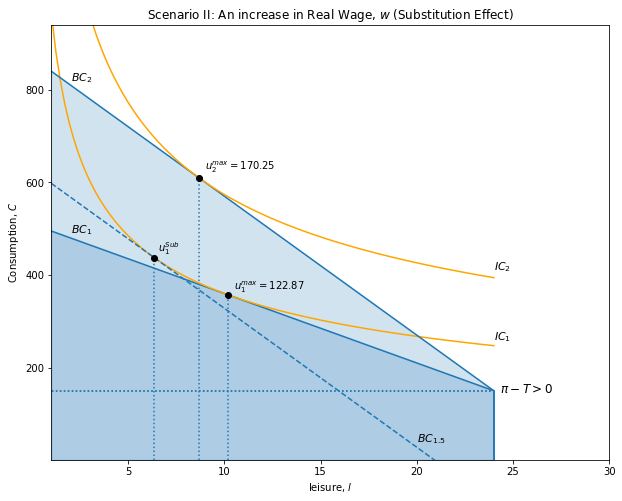

In [16]:
"""
Plot the change in real wage and the point indicating the Substitution Effect
"""
fig, ax = plt.subplots(figsize=(10, 8))
plot_budget_constraint_(ax, l, H, w, pi, T)
ax.plot(l, C_indifference(l, optimal_U_, alpha=0.3), color='orange')
ax.plot(optimal_l_, optimal_C_,'ro',color='black') # a black dot
ax.text(optimal_l_*1.03,optimal_C_*1.03,f'$u^{{max}}_{1} = {np.round(optimal_U_,2)}$') # multiply by 1.03 to give space;
ax.vlines(x=optimal_l_,ymin=0,ymax=optimal_C_, color='tab:blue', linestyles='dotted')
ax.text(24.3, 150.3, "$\pi_{}-T > 0$", fontsize=12) # add text describing the kink at pi

plot_budget_constraint_(ax, l, H, w_, pi, T)
ax.plot(l, C_indifference(l, optimal_U_new, alpha=0.3), color='orange')
ax.plot(l, C_bc(H, l, w_, pi_sub, T), color='tab:blue', linestyle='dashed') # plot the budget constraint tangent to the point under substition effect
ax.plot(optimal_l_new, optimal_C_new,'ro',color='black') # a black dot
ax.text(optimal_l_new*1.03,optimal_C_new*1.03,f'$u^{{max}}_{2} = {np.round(optimal_U_new,2)}$') # multiply by 1.03 to give space;
ax.vlines(x=optimal_l_new,ymin=0,ymax=optimal_C_new, color='tab:blue', linestyles='dotted')
ax.plot(l_sub, C_sub,'ro',color='black') # a black dot
ax.vlines(x=l_sub,ymin=0,ymax=C_sub, color='tab:blue', linestyles='dotted')
ax.text(l_sub*1.03,C_sub*1.03,'$u^{{Sub}}_{1}$') # multiply by 1.03 to give space;
ax.text(20, 40, "$BC_{1.5}$", fontsize=11) # add a label dashed budget constraint
ax.text(2, 820, "$BC_{2}$", fontsize=11) # add a label indicating new budget constraint (BC)
ax.text(2, 490, "$BC_{1}$", fontsize=11) # add a label indicating original budget constraint (BC)
ax.text(24, 260, "$IC_{1}$", fontsize=11) # add a label indicating original IC
ax.text(24, 410, "$IC_{2}$", fontsize=11) # add a label indicating new IC

As shown in the plot above, the substitution effect is the movement in $l$ from $U^{max}_{1}$ to $U^{Sub}_{1}$. I also added the budget constraint that is tangent to $U^{Sub}_{1}$ which is shown as the dashed line below ($BC_{1.5}$). $BC$ denotes the budget constraints while $IC$ denotes the indifference curves.

It is important to highlight that as $w$ increased, the cost of $l$ increased as well relative to $C$. As a result, the representative consumer substitutes away from the more expensive good, $l$, to the relatively cheaper good $C$. The movement from $U^{Sub}_{1}$ to $U^{max}_{2}$ is the pure income effect since the real wage stayed constant when moving from the dashed budget line, $BC_{1.5}$ to the new budget line, $BC_{2}$. Since both $l$ and $C$ are normal goods, the representative consumer can consume more $l$ and $C$, as shown in the shift from $U^{Sub}_{1}$ to $U^{max}_{2}$. While Williamson (2014) notes that leisure could rise or fall given an increase in $w$, the result above shows that total effect is for $l$ to fall when $w$ rose.

## The Labour Supply Curve <a name="labsupply"></a>

In this section, I will show how to construct and plot the labour supply curve. As Williamson (2014) mentioned, constructing the labour supply curve could be imagined as giving the representative consumer a possible range of real wages and then asking how much labour would the consumer supply at each wage. With this in mind, the labour supply curve is shown as:

$$N^{s}(w) = h - l(w)$$

Assuming that the substitution effect is greater than the income effect as shown in the plot for Scenario II, then the labour supply $N^{s}$ is increasing in real wage, $w$. In the section of code below, I created an array for $w$ and then I used a for-loop to solve the values of leisure provided at different values of $w$. I used a list comprehension which subtracts $h$ by a given value of $w$ to obtain the amount of labour supplied, $N_{s}$.

In [121]:
"""
Deriving the Labour Supply Curve
"""
# use a for-loop of optimal bundles at different levels of wages
w_ = np.arange(10,50,1) # an array of wages from 10 to 50.
l_ = [] # empty list to append optimal values of leisure
def labour_supply(w): # Python function to calculate optimal leisure at different levels of wages
    for wage in w:
        def objective(l, w = wage, H = 24, pi = 200, T = 50):
            """
            Return value of -U for a given leisure, at a possible level of consumption.
            """
            C = C_bc(H, l, w, pi, T)
            return -U(l, C)
        result = minimize_scalar(objective)
        optimal_l = result.x # get optimal leisure
        l_.append(optimal_l) # append optimal values of consuption
        
labour_supply(w_) # call labour supply function    
N_s = [24 - l_ for l_ in l_] # create an array of labour supply via a list comprehension

The code below plots the labour supply curve. 

Text(15.9, 47, '$N_{s}$')

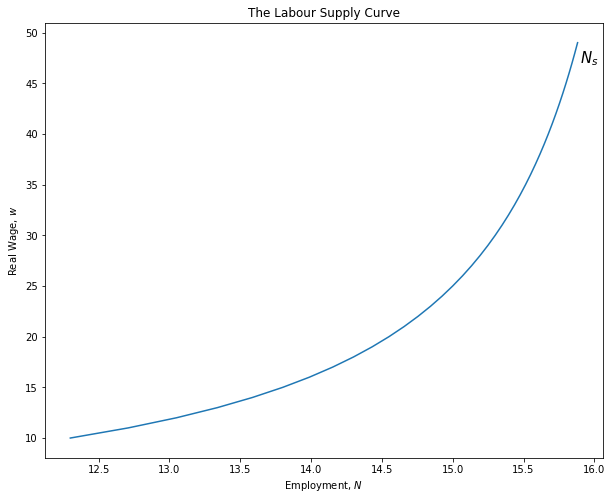

In [126]:
fig, ax = plt.subplots(figsize=(10, 8))
# set the title, xlabel, and ylabel
ax.set(title="The Labour Supply Curve", xlabel=r'Employment, $N$', ylabel=r'Real Wage, $w$') 
ax.plot(N_s, w_, color='tab:blue') # plot the labour supply curve
ax.text(15.9, 47, "$N_{s}$", fontsize=15) # add text describing the labour supply curve

Given that $N_{s}$ is increases when $w$ increases, the labour supply curve is upward-sloping as shown in the plot above.

## Shift in the Labour Supply Curve <a name="labsupplyshift"></a>

It is also mentioned in the section for Scenario I (Pure Income Effect), that when $\pi$ increases, the possible bundle of $l$ and $C$ that can be consumed also increases, since both are normal goods. As a result, when $\pi$ increases, the amount of labour supplied decreases, resulting in a leftward shiftthe labour supply. The following sections of code below implements the change in $\pi$ and plots the old and new labour supply curves.

In [127]:
"""
Shift in the Labour Supply Curve given increase in the Real Wage, pi
"""
# use a for-loop of optimal bundles at different levels of wages
w_ = np.arange(10,50,1) # an array of wages from 10 to 50.
l_ = [] # empty list to append optimal values of leisure
l_new = [] # empty list to append optimal values of new leisure given change in pi

def labour_supply(w): # function to calculate optimal leisure at different levels of wages
    for wage in w:
        def objective(l, w = wage, H = 24, pi = 200, T = 50):
            """
            Return value of -U for a given leisure, at a possible level of consumption.
            """
            C = C_bc(H, l, w, pi, T)
            return -U(l, C)
        result = minimize_scalar(objective)
        optimal_l = result.x # get optimal leisure
        l_.append(optimal_l)

I created another Python function to calculate the new values of leisure at a new value of $\pi$ which is set at $250.00.

Text(15.9, 47, '$N^{1}_{s}$')

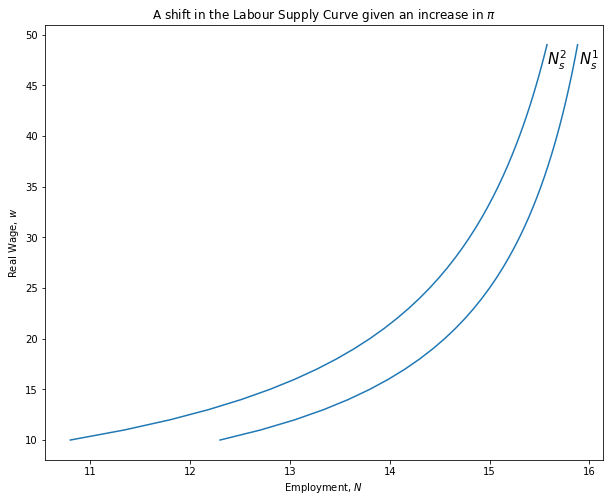

In [128]:
def labour_supply_(w): # function to calculate optimal leisure at different levels of wages under new income level
    for wage in w:
        def objective(l, w = wage, H = 24, pi = 250, T = 50):
            """
            Return value of -U for a given leisure, at a possible level of consumption.
            """
            C = C_bc(H, l, w, pi, T)
            return -U(l, C)
        result = minimize_scalar(objective)
        optimal_l = result.x # get optimal leisure
        l_new.append(optimal_l)
        
labour_supply(w_) # call labour supply function    
labour_supply_(w_) # call new labour supply function
N_s = [24 - l_ for l_ in l_] # create an array of labour supply using a list comprehension
N_s_new = [24 - l_new for l_new in l_new] # create an array of new labour supply using a list comprehension

# Plot the labour supply curve
fig, ax = plt.subplots(figsize=(10, 8))
# set the title, xlabel, and ylabel
ax.set(title="A shift in the Labour Supply Curve given an increase in $\pi$", xlabel=r'Employment, $N$', ylabel=r'Real Wage, $w$')
ax.plot(N_s, w_, color='tab:blue') # plot the labour supply curve
ax.plot(N_s_new, w_, color='tab:blue') # plot the new labour supply curve
ax.text(15.58, 47, "$N^{2}_{s}$", fontsize=15) # add text describing the labour supply curve
ax.text(15.9, 47, "$N^{1}_{s}$", fontsize=15) # add text describing the new labour supply curve